In [3]:
import pandas as pd

file_path = "Disease_symptom_and_patient_profile_dataset.csv"
df = pd.read_csv(file_path)

# Performing feature engineering
# 1. The age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 40, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])

# 2. Symptoms Count
df['Symptom Count'] = df[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']].apply(lambda x: x.eq('Yes').sum(), axis=1)

# 3.Encoding the gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 4. ncoding blood pressure
df['Blood Pressure'] = df['Blood Pressure'].map({'Normal': 0, 'High': 1})

# Blood Pressure unique values (before the handling of missing values)
print("Unique values in 'Blood Pressure' column before handling missing values:")
print(df['Blood Pressure'].unique())

# Handle'Blood Pressure' column missing values
df['Blood Pressure'].fillna(value=0, inplace=True)

# Blood Pressure unique values handling missing values)
print("\nUnique values in 'Blood Pressure' column after handling missing values:")
print(df['Blood Pressure'].unique())

# 5.Encoding Cholesterol Level
df['Cholesterol Level'] = df['Cholesterol Level'].map({'Normal': 0, 'High': 1})

print("First few rows of the dataset with new features:")
print(df.head())

Unique values in 'Blood Pressure' column before handling missing values:
[nan  0.  1.]

Unique values in 'Blood Pressure' column after handling missing values:
[0. 1.]
First few rows of the dataset with new features:
       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19       1   
1  Common Cold    No   Yes     Yes                   No   25       1   
2       Eczema    No   Yes     Yes                   No   25       1   
3       Asthma   Yes   Yes      No                  Yes   25       0   
4       Asthma   Yes   Yes      No                  Yes   25       0   

   Blood Pressure  Cholesterol Level Outcome Variable    Age Group  \
0             0.0                0.0         Positive  Young Adult   
1             0.0                0.0         Negative  Young Adult   
2             0.0                0.0         Negative  Young Adult   
3             0.0                0.0         Positive  Young Adult   


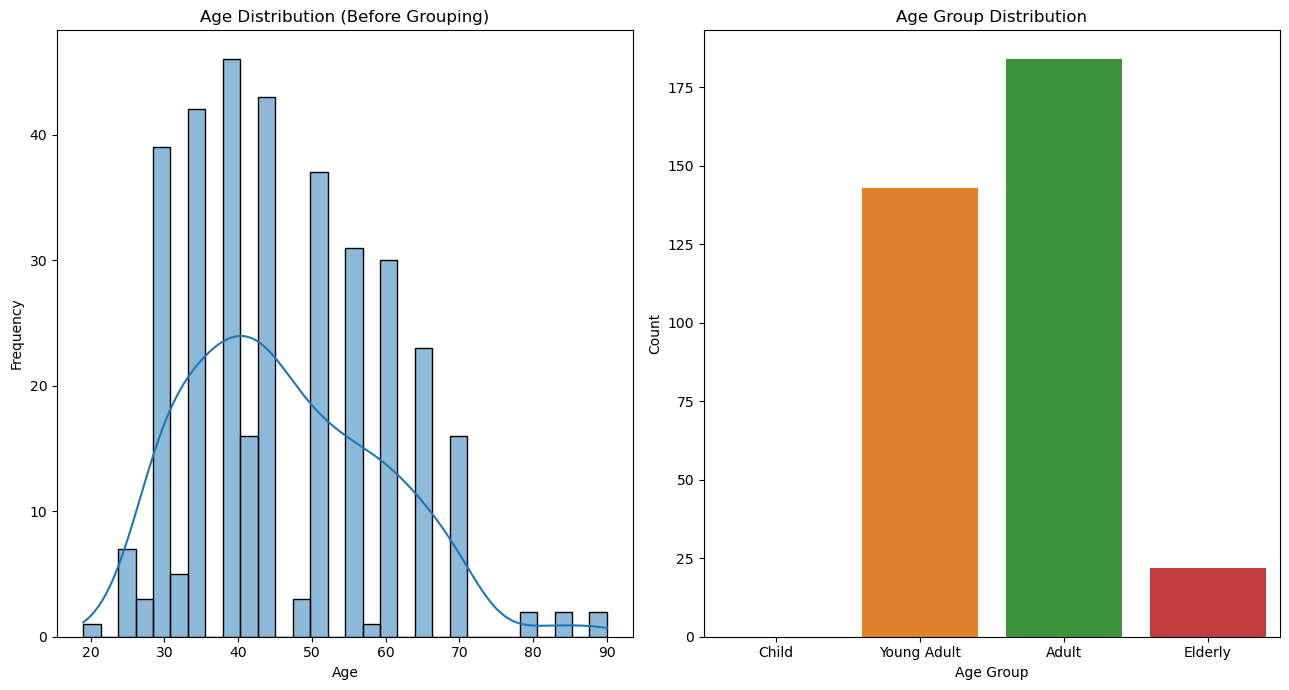

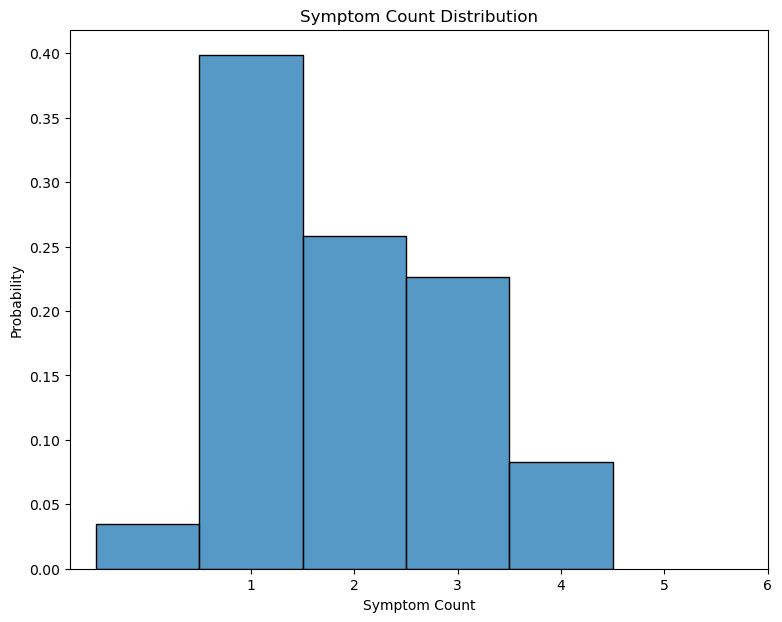

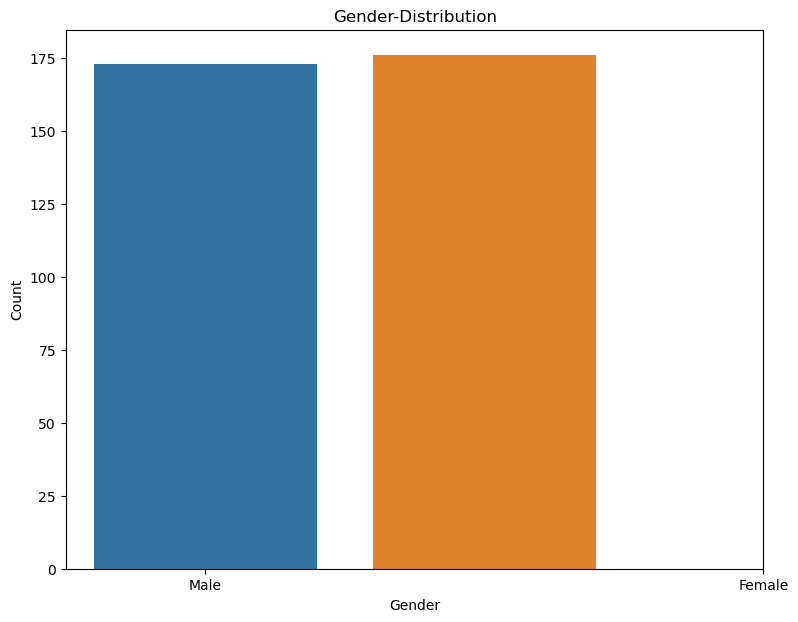

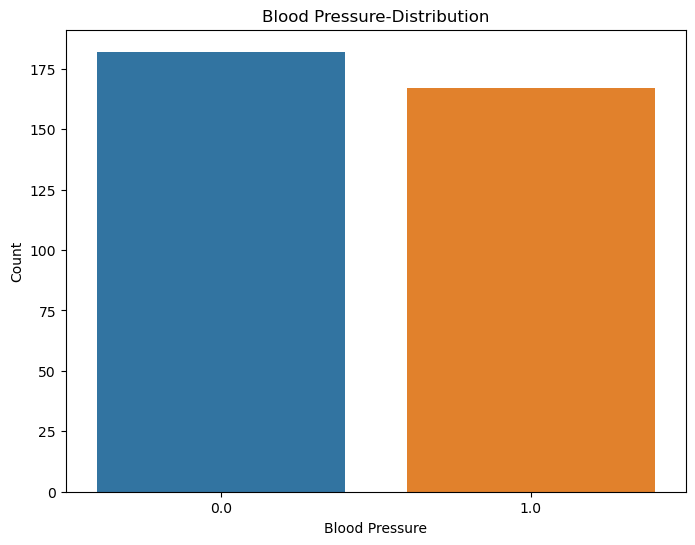

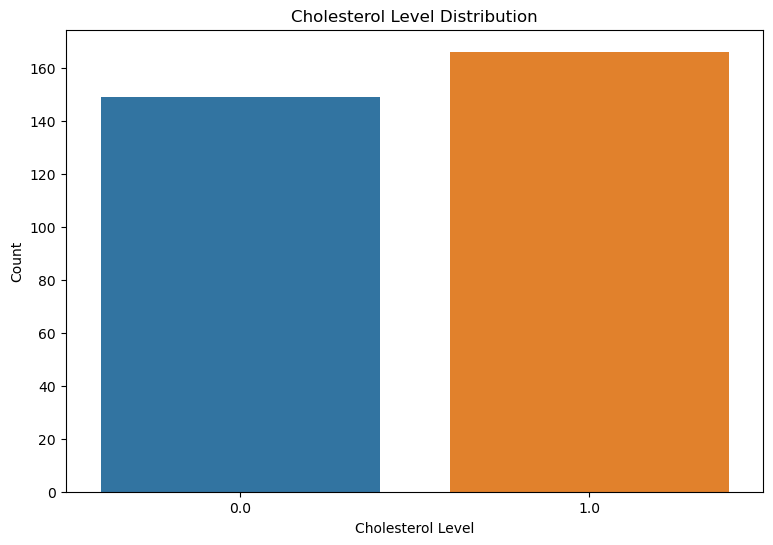

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution (Before Grouping)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Age Group', data=df)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Displyaing the symptom Count Distribution
plt.figure(figsize=(9, 7))
sns.histplot(df['Symptom Count'], bins=range(1, 7), discrete=True, stat='probability')
plt.title('Symptom Count Distribution')
plt.xlabel('Symptom Count')
plt.ylabel('Probability')
plt.xticks(range(1, 7))
plt.show()

# Distribution of gender
plt.figure(figsize=(9, 7))
sns.countplot(x='Gender', data=df)
plt.title('Gender-Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 2], labels=['Male', 'Female'])
plt.show()

# Distribution of Blood Pressure
plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Pressure', data=df)
plt.title('Blood Pressure-Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

# Distribution Cholesterol Level
plt.figure(figsize=(9, 6))
sns.countplot(x='Cholesterol Level', data=df)
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()
